In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

In [82]:
data = pd.read_csv("./망고플레이트전국댓글.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658251 entries, 0 to 658250
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   리뷰내용    657292 non-null  object
 1   작성자명    657680 non-null  object
 2   후기점수    658251 non-null  object
 3   url     658251 non-null  object
 4   ID      658251 non-null  object
dtypes: object(5)
memory usage: 25.1+ MB


In [4]:
(data.duplicated(['리뷰내용','작성자명']) == False).sum()

93320

In [83]:
# 중복된 값 제거하기
data = data.drop_duplicates(['리뷰내용','작성자명'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93320 entries, 0 to 658250
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰내용    93180 non-null  object
 1   작성자명    93282 non-null  object
 2   후기점수    93320 non-null  object
 3   url     93320 non-null  object
 4   ID      93320 non-null  object
dtypes: object(5)
memory usage: 4.3+ MB


In [84]:
data['ID'].nunique()

5742

In [8]:
# 이 방법은 시리즈로 나오니까 데이터프레임으로 보고 싶으면
data['ID'].value_counts()

ID
s6C_cdBQX0rj    373
1pmv75vVQx      294
fPi6OZ3r-u      246
y-_XMRSTNrAi    241
gL8RksQTNk      240
               ... 
hrXaBy-1Q3c9      1
orbamYbLUuIw      1
qagtMIp26hNZ      1
OdOMcRj37n2v      1
XGnBYklKwi        1
Name: count, Length: 5742, dtype: int64

In [85]:
# 데이터프레임 형태로 볼 수 있어.
data.groupby('ID')[['리뷰내용']].count()

,리뷰내용
ID,
--IQdCMyShbu,6
--PbUbWkr5xp,2
-0aeDar1Ie,8
-0iuKSUEFRvZ,13
-1LZImufBV8E,3
...,...
zwRLQ9Byr2,6
zxgTXotiK5bQ,1
zxqKlZqoho,4


In [86]:
review_counts = data.groupby('ID')[['리뷰내용']].count()

In [87]:
review_counts.sort_values(by='리뷰내용', ascending=False)

,리뷰내용
ID,
s6C_cdBQX0rj,372
1pmv75vVQx,287
fPi6OZ3r-u,246
y-_XMRSTNrAi,241
gL8RksQTNk,239
...,...
nwykgqfbYx,1
AzIdNOqU_tl3,1
noi8A_NGrRBL,1


In [12]:
review_counts['리뷰내용'] > 20

ID
--IQdCMyShbu    False
--PbUbWkr5xp    False
-0aeDar1Ie      False
-0iuKSUEFRvZ    False
-1LZImufBV8E    False
                ...  
zwRLQ9Byr2      False
zxgTXotiK5bQ    False
zxqKlZqoho      False
zzs7gkIn9R      False
zzulPTWCNorK    False
Name: 리뷰내용, Length: 5742, dtype: bool

In [13]:
review_counts[review_counts['리뷰내용'] > 20]

,리뷰내용
ID,
-1rMxmPWvg,32
-1yzcgbtF5,96
-9jLnAAJZc,25
-D6qxV9cg9mT,23
-EDDtVfafvaS,29
...,...
zYzhPaX003,69
z_sD7nAsh7V0,51
zq9bIKh6PMLV,37


In [88]:
over20reviews = review_counts[review_counts['리뷰내용'] > 20]

In [15]:
over20reviews # ID는 인덱스고, 리뷰내용은 컬럼임.

,리뷰내용
ID,
-1rMxmPWvg,32
-1yzcgbtF5,96
-9jLnAAJZc,25
-D6qxV9cg9mT,23
-EDDtVfafvaS,29
...,...
zYzhPaX003,69
z_sD7nAsh7V0,51
zq9bIKh6PMLV,37


In [16]:
over20reviews.index

Index(['-1rMxmPWvg', '-1yzcgbtF5', '-9jLnAAJZc', '-D6qxV9cg9mT',
       '-EDDtVfafvaS', '-G-YWwpe9D', '-LWflJV1maU2', '-SMNjUsH3i',
       '-SvQDki5HNzQ', '-UUbd93wKH0H',
       ...
       'zNVXE1__XF', 'zOOlz9vfJfFF', 'zSujg5KWKY1W', 'zSxicuDvNH',
       'zWVgSFqWIQrj', 'zYzhPaX003', 'z_sD7nAsh7V0', 'zq9bIKh6PMLV',
       'ztTTr81jaBm7', 'zv1rcsrmRU4S'],
      dtype='object', name='ID', length=1117)

In [89]:
over20reviews_shops = over20reviews.index

In [18]:
#리스트로 들어와있음
over20reviews_shops 

Index(['-1rMxmPWvg', '-1yzcgbtF5', '-9jLnAAJZc', '-D6qxV9cg9mT',
       '-EDDtVfafvaS', '-G-YWwpe9D', '-LWflJV1maU2', '-SMNjUsH3i',
       '-SvQDki5HNzQ', '-UUbd93wKH0H',
       ...
       'zNVXE1__XF', 'zOOlz9vfJfFF', 'zSujg5KWKY1W', 'zSxicuDvNH',
       'zWVgSFqWIQrj', 'zYzhPaX003', 'z_sD7nAsh7V0', 'zq9bIKh6PMLV',
       'ztTTr81jaBm7', 'zv1rcsrmRU4S'],
      dtype='object', name='ID', length=1117)

# 전체 데이터에서 over20reviews_shops 에 해당하는 가게만 필터링해서 새로운 데이터 프레임 만들기

In [19]:
data['ID'] == '-1rMxmPWvg' # True False가 나온다는 건 필터링이 가능하다!

0         False
1         False
2         False
3         False
4         False
          ...  
658246    False
658247    False
658248    False
658249    False
658250    False
Name: ID, Length: 93320, dtype: bool

In [20]:
data[data['ID'] == '-1rMxmPWvg']

,리뷰내용,작성자명,후기점수,url,ID
584281,가자미 물회 처음 먹어보는데 새콤달큰 너무 맛있고 우럭 미역국 짱 부드러워욤뇸,빙구,맛있다,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg
584282,제 기준으로 무조건 망플4점 넘어야하는거 아닌가 싶은 정도로 맛있는 곳입니다. 물회...,LeeZi,맛있다,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg
584283,사천항 가면 꼭 먹는 물회집이에요~ 코로나때문인지 예전만큼 웨이팅이 길진 않은데 맛...,mya,괜찮다,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg
584284,물회 만큼이나 유명한 미역국. 물회 맛집이지만 미역국 맛집 이기도 합니다. 식사하는...,mya,맛있다,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg
584285,미역국 꼭 먹어봐야 한대서 왔습니다. 사실 가자미 물회를 더 맛보고 싶어서 가게 됐...,식품업계종사자,괜찮다,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg
584286,재료 소진시엔 문을 닫는 맛집이라 선택권 없이 가자미 물회만 남아서 가자미 물회 먹...,mya,맛있다,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg
584287,망고플레이트에서 여기가 미역국맛집이라고 해서 다녀왔어요. 회랑 미역국 중에서 뭐먹을...,happynewyear,맛있다,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg
584288,물회를 좋아하는 나에게 딱 스탠다드한 오징어 물회 선사 ㅎㅎ,Yongman,맛있다,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg
584289,우럭미역국이 맛있어요 물회는 맛이 보통인데 가격이 18000원은 비싸네요. 제 입맛...,업사이드,괜찮다,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg
584290,흠 너무 비싸고 평범한 맛..;;; 가자미 물회 한 그릇에 18000원인데 퀄리티에...,진리지안,별로,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg


In [90]:
# 필터링하기
data[data['ID'].apply(lambda x: x in over20reviews_shops)]

,리뷰내용,작성자명,후기점수,url,ID
0,맛있네요,-,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
1,가로수길,전예원,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
2,맛있어요,전예원,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
3,언제와도 맛있는 미라이!!!고등어산도는 무조건 시켜야하구요.. (식빵 뭔지 궁금) ...,스틱스강에맹세하는맛집,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
4,"아와이 야끼소바,사바산도,우니 아마에비 호다테먹었어요.나마비루도 함께^^나마비루 부...",ㅇㅇ,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
...,...,...,...,...,...
657692,나름 맛있고 반찬도 잘나오는 편. 수요미식회에 나왔다는데 그정도로 맛집이라기보다는 ...,쵸미,맛있다,https://www.mangoplate.com/restaurants/1rKcioby5B,1rKcioby5B
657693,바싹불고기에 불맛이 제대로 배어있다.육회는 참기름과 마늘향이 강해 고기맛을 느낄수없...,리핑,괜찮다,https://www.mangoplate.com/restaurants/1rKcioby5B,1rKcioby5B
657694,연탄불고기느낌? ㅋ 서울이랑비슷 더 바싹해지면 좋았을듯.. 만팔천원 식사포함.. 덜 달다,무나&뎅,괜찮다,https://www.mangoplate.com/restaurants/1rKcioby5B,1rKcioby5B
657695,언양에 손님이 왔으면 한번쯤 들르는 언양불고기집. 식당의 규모와 구조를 보면 오래되...,Gastronomy,괜찮다,https://www.mangoplate.com/restaurants/1rKcioby5B,1rKcioby5B


In [91]:
over20df = data[data['ID'].apply(lambda x: x in over20reviews_shops)]

* 리뷰내용 길이가 4 이상인 리뷰만 남김

In [92]:
over20df['리뷰내용'].astype('str')

0                                                      맛있네요
1                                                      가로수길
2                                                      맛있어요
3         언제와도 맛있는 미라이!!!고등어산도는 무조건 시켜야하구요.. (식빵 뭔지 궁금) ...
4         아와이 야끼소바,사바산도,우니 아마에비 호다테먹었어요.나마비루도 함께^^나마비루 부...
                                ...                        
657692    나름 맛있고 반찬도 잘나오는 편. 수요미식회에 나왔다는데 그정도로 맛집이라기보다는 ...
657693    바싹불고기에 불맛이 제대로 배어있다.육회는 참기름과 마늘향이 강해 고기맛을 느낄수없...
657694    연탄불고기느낌? ㅋ 서울이랑비슷 더 바싹해지면 좋았을듯.. 만팔천원 식사포함.. 덜 달다
657695    언양에 손님이 왔으면 한번쯤 들르는 언양불고기집. 식당의 규모와 구조를 보면 오래되...
657696    This is a bulgogi restaurant in an big old hou...
Name: 리뷰내용, Length: 60673, dtype: object

In [93]:
over20df['리뷰내용'] = over20df['리뷰내용'].astype('str')

C:\Users\hi\AppData\Local\Temp\ipykernel_4532\3256979473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over20df['리뷰내용'] = over20df['리뷰내용'].astype('str')


In [94]:
# NaN값을 float으로 처리가 돼서 object of type 'float' has no len() 이런 오류가 뜸.
over20df['리뷰내용'].apply(len) >= 4

0         True
1         True
2         True
3         True
4         True
          ... 
657692    True
657693    True
657694    True
657695    True
657696    True
Name: 리뷰내용, Length: 60673, dtype: bool

In [95]:
over20df[over20df['리뷰내용'].apply(len) >= 4]

,리뷰내용,작성자명,후기점수,url,ID
0,맛있네요,-,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
1,가로수길,전예원,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
2,맛있어요,전예원,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
3,언제와도 맛있는 미라이!!!고등어산도는 무조건 시켜야하구요.. (식빵 뭔지 궁금) ...,스틱스강에맹세하는맛집,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
4,"아와이 야끼소바,사바산도,우니 아마에비 호다테먹었어요.나마비루도 함께^^나마비루 부...",ㅇㅇ,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
...,...,...,...,...,...
657692,나름 맛있고 반찬도 잘나오는 편. 수요미식회에 나왔다는데 그정도로 맛집이라기보다는 ...,쵸미,맛있다,https://www.mangoplate.com/restaurants/1rKcioby5B,1rKcioby5B
657693,바싹불고기에 불맛이 제대로 배어있다.육회는 참기름과 마늘향이 강해 고기맛을 느낄수없...,리핑,괜찮다,https://www.mangoplate.com/restaurants/1rKcioby5B,1rKcioby5B
657694,연탄불고기느낌? ㅋ 서울이랑비슷 더 바싹해지면 좋았을듯.. 만팔천원 식사포함.. 덜 달다,무나&뎅,괜찮다,https://www.mangoplate.com/restaurants/1rKcioby5B,1rKcioby5B
657695,언양에 손님이 왔으면 한번쯤 들르는 언양불고기집. 식당의 규모와 구조를 보면 오래되...,Gastronomy,괜찮다,https://www.mangoplate.com/restaurants/1rKcioby5B,1rKcioby5B


In [96]:
# 길이가 4 이상인 데이터만 저장
over20df = over20df[over20df['리뷰내용'].apply(len) >= 4]

In [97]:
over20df['ID'].nunique()

1117

# ID별로 변수를 생성하고 ID별 데이터프레임 생성
* globals()를 이용해 자동으로 변수 만들기
* 사용하는 방법: globals()['변수명']

# 변수 생성규칙
* 변수는 반드시 문자로 시작해야 한다.
* 변수에는 '-'을 사용할 수 없다. '_'는 가능

In [29]:
# 변수를 만들 때는 문자열 포메팅으로 만들 수 없다.

In [98]:
# ID중복제거
set(over20df['ID'])

{'95qxQRtNJ7',
 'z-4tCw3TKCKn',
 'N6w7uRM87AFF',
 'PRp5uBgsOXUB',
 '1wuy7OLPF6RB',
 '1DoTDiGuCe',
 'SaCJTvz6fPV8',
 'RV4Zzfq6pY5F',
 '6bp9NtVjCCwL',
 'DtNd7lLzTLZU',
 'PHhjurEApSpz',
 'wb8qseDzWz--',
 'chRlP6_axm',
 '2qFEx0pXrDdZ',
 'qDEx6OvquvRg',
 'IRzTlg4LWoZs',
 'XtoUWBHKT6wT',
 'n4N6o-A4zE',
 '6xQY0t3A6o',
 'G2ru9jzd7nEu',
 'QT2Oqp0tHL',
 'ElOtkXR8nKHV',
 'dQFSBbkQXG',
 'W7ie2Qm0gZ',
 '78XDv53pER',
 'XFe6Dh0ixpl9',
 'zYzhPaX003',
 'r5ZoupYsk_',
 'eumy5vRx5i',
 '-SvQDki5HNzQ',
 'Xoqe_P0XzBFZ',
 'BV4sbL163o',
 'npW57UkUZN',
 '7DQsq__rh_6R',
 'rGU39IqaaEHz',
 'mHUN9NmKbt',
 'r591ZGDG0B5S',
 '7RC_kR4A9C9O',
 '02sGwSC9-K_E',
 'RTC_u7jrxHMl',
 'kDd7uvQkQJxl',
 'xS--jmJRTWrW',
 'kw9JM_fDCE',
 'bCF4FCZPy1Cs',
 'ZpE60fZcfqLK',
 '6CL8lm8a-sTa',
 'j2R6rYHA07',
 '-tjn7yYAEu7u',
 'R3iHj7sZaI',
 'XxaofOrFPS7c',
 'UgFHZZczFUX-',
 '5HeqtDuK5R',
 '0mXVkmTdJ7-A',
 'nie2d4skIs43',
 'xhT-Oi0nDTh3',
 'cOPpYpvBoWrH',
 'RuhAIld9MRhW',
 'aU9XYWbj0z',
 'Hr3c9foXkB',
 'TNywLOfH_r',
 'huHObYt4jS',
 'yf06Mlf

In [99]:
ids = list(set(over20df['ID']))

In [32]:
# 중복되지 않은 ID이름이 나옴.
for id_name in ids:
    print(id_name)

95qxQRtNJ7
z-4tCw3TKCKn
N6w7uRM87AFF
PRp5uBgsOXUB
1wuy7OLPF6RB
1DoTDiGuCe
SaCJTvz6fPV8
RV4Zzfq6pY5F
6bp9NtVjCCwL
DtNd7lLzTLZU
PHhjurEApSpz
wb8qseDzWz--
chRlP6_axm
2qFEx0pXrDdZ
qDEx6OvquvRg
IRzTlg4LWoZs
XtoUWBHKT6wT
n4N6o-A4zE
6xQY0t3A6o
G2ru9jzd7nEu
QT2Oqp0tHL
ElOtkXR8nKHV
dQFSBbkQXG
W7ie2Qm0gZ
78XDv53pER
XFe6Dh0ixpl9
zYzhPaX003
r5ZoupYsk_
eumy5vRx5i
-SvQDki5HNzQ
Xoqe_P0XzBFZ
BV4sbL163o
npW57UkUZN
7DQsq__rh_6R
rGU39IqaaEHz
mHUN9NmKbt
r591ZGDG0B5S
7RC_kR4A9C9O
02sGwSC9-K_E
RTC_u7jrxHMl
kDd7uvQkQJxl
xS--jmJRTWrW
kw9JM_fDCE
bCF4FCZPy1Cs
ZpE60fZcfqLK
6CL8lm8a-sTa
j2R6rYHA07
-tjn7yYAEu7u
R3iHj7sZaI
XxaofOrFPS7c
UgFHZZczFUX-
5HeqtDuK5R
0mXVkmTdJ7-A
nie2d4skIs43
xhT-Oi0nDTh3
cOPpYpvBoWrH
RuhAIld9MRhW
aU9XYWbj0z
Hr3c9foXkB
TNywLOfH_r
huHObYt4jS
yf06Mlf96h
LaDksAG6qj
q-ImZ-DGRhlY
0XV1ftp1ee_M
ULxmbNiSxZ
A2WMRSbPSYb_
dqL32F-fFBqa
SDE1sBTY79Wu
go9COSz7hx
GiyIDtkHWg
TZr70fpRQaOl
DemJJ12C1J
BQxl590Vix-Y
YM03z4lpvY
IP_JKNwjYkyz
7RxQALnw5C
KV9lSGa6xNQp
0hflR8ZCg5
U1VsV7e2K2
b_gNU4tCqinD
-1rMxmPWvg
sF

In [100]:
over20df['ID'] == ids[0]

0         False
1         False
2         False
3         False
4         False
          ...  
657692    False
657693    False
657694    False
657695    False
657696    False
Name: ID, Length: 60093, dtype: bool

In [34]:
over20df[over20df['ID'] == ids[0]]

,리뷰내용,작성자명,후기점수,url,ID
460769,친구가 정말 좋아하는 곳이라고 해서 절 데려갔는데 고기냄새가 나서 별로 였습니다ㅠㅠ...,쥬냠,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
460770,유명한곳ㅎㅎ24시굿굿 사람도 많았다 기대를 해서 생각보다 막 맛있는건 아니였지만 소...,먹깨비요정*,맛있다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
460771,그냥 해장국 맛~ ㅎㅎ딱히 특별한건 모르겠다.(뼈찜이 유명한 집이었습니다..)다음에...,빨강코알라,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
460772,여기 너무너무너무 와보고 싶었는데 드디어 와봤네요!!8명 단체로 일욜 점심에 방문했...,Jinny,맛있다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
460773,태어나서 처음 먹어본 뼈숯불구이. 우리는 둘이서 소 사이즈를 주문했어요. 주문을 하...,뇽뇽,맛있다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
...,...,...,...,...,...
461284,"-18.07.06(금) 방문-선릉역에는 맛집이 참 많은데, 신동궁도 꽤 오래전부터 ...",면주,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
461285,소주를 먹으로 밤에 많은 사람들이 찾는곳이다.매운걸 못먹는사람은 뼈숯불구이는 안먹기...,심야식당,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
461286,신동궁 뼈 숮불구이돼지등뼈를 숯불에 구워 양념을 익혀 골골루매운향이 베어있어 중독적...,민욱,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
461287,친구랑 둘이가서 뼈숯불구이 소자 (28000원)을 시켰어요배부르게 잘 먹었습니다 뼈...,zzzzzo!,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7


In [35]:
test1 = over20df[over20df['ID'] == ids[0]]

변수 이름에는 -도 허용이 안되고, 숫자로 시작해도 안돼.


In [101]:
over20df['ID'] = over20df['ID'].str.replace("-","_")

In [102]:
ids = list(set(over20df['ID']))

In [103]:
len(ids)

1117

In [104]:
# globals()을 이용해서 각각 id_name의 변수가 만들어진다 변수 이름은 숫자로 시작하면 안되기 때문에 모든 변수 이름에 문자로 시작하게 하기 위해서 'd_'를 추가한거야
dfs = []
for id_name in ids:
    globals()[f"d_{id_name}"] = over20df[over20df['ID']==id_name]
    dfs.append("d_"+id_name)
    

In [106]:
dfs # 최종 만들어진 변수이름.

['d_95qxQRtNJ7',
 'd_N6w7uRM87AFF',
 'd_PRp5uBgsOXUB',
 'd_1wuy7OLPF6RB',
 'd_1DoTDiGuCe',
 'd_SaCJTvz6fPV8',
 'd__YlpfJtxXBsm',
 'd_RV4Zzfq6pY5F',
 'd_6bp9NtVjCCwL',
 'd_DtNd7lLzTLZU',
 'd_WupMPmXk6_',
 'd_PHhjurEApSpz',
 'd__UUbd93wKH0H',
 'd_2qFEx0pXrDdZ',
 'd_chRlP6_axm',
 'd_qDEx6OvquvRg',
 'd_IRzTlg4LWoZs',
 'd_XtoUWBHKT6wT',
 'd_6xQY0t3A6o',
 'd_G2ru9jzd7nEu',
 'd_QT2Oqp0tHL',
 'd_ElOtkXR8nKHV',
 'd_dQFSBbkQXG',
 'd_W7ie2Qm0gZ',
 'd_78XDv53pER',
 'd_XFe6Dh0ixpl9',
 'd_zYzhPaX003',
 'd_r5ZoupYsk_',
 'd_eumy5vRx5i',
 'd_Xoqe_P0XzBFZ',
 'd_BV4sbL163o',
 'd_npW57UkUZN',
 'd_7DQsq__rh_6R',
 'd_rGU39IqaaEHz',
 'd_mHUN9NmKbt',
 'd_r591ZGDG0B5S',
 'd_7RC_kR4A9C9O',
 'd_RTC_u7jrxHMl',
 'd_kDd7uvQkQJxl',
 'd_Bcbw_lMGoz',
 'd_kw9JM_fDCE',
 'd_bCF4FCZPy1Cs',
 'd_ZpE60fZcfqLK',
 'd_j2R6rYHA07',
 'd_R3iHj7sZaI',
 'd_XxaofOrFPS7c',
 'd_vRjc_JKA_oDW',
 'd_5HeqtDuK5R',
 'd_nie2d4skIs43',
 'd_cOPpYpvBoWrH',
 'd_RuhAIld9MRhW',
 'd_aU9XYWbj0z',
 'd_Hr3c9foXkB',
 'd_TNywLOfH_r',
 'd_UgFHZZczFUX_',
 

In [107]:
def dfbyid(ids):
    dfs = []
    for idx, id_name in enumerate(ids):
        globals()[f"d_{id_name}"] = over20df[over20df['ID']==id_name] # 변수를 자동으로 생성해서 id별 DataFrame만들기
        dfs.append("d_"+id_name) # ID가 숫자로 생성하면 안되므로 앞에 d_붙이며 문자로 시작하게 만듦.
        print(f"{idx+1}/{len(ids)} 처리중", end="\r") # 현재 진행 사항 표시
    return dfs

In [108]:
dfs = dfbyid(ids)

In [42]:
YtI0ysL08J # 각 변수 이름으로 데이터프레임이 저장 됨.

NameError: name 'YtI0ysL08J' is not defined

In [ ]:
dfs

In [ ]:
d_K9X9Uwxw__

* ID별 데이터프레임에서 리뷰내용을 추출해 ID별 변수에 합치고, 텍스트 전처리하고 워드 클라우드 만들기

In [ ]:
test = []
d_K9X9Uwxw__['리뷰내용'].apply(lambda x: test.append(x) )

In [49]:
all_text = []
for item in d_K9X9Uwxw__['리뷰내용']:
    all_text.append(item)

536555                     청평 닭갈비, 철판닭갈비는 여기가 1인자몇년째 여기만 가요
536556    70분 기다려서 주방 앞자리 앉았는데 못볼꼴을 봄.스테인리스 주걱이 떨어져서 큰 소...
536557    향은 간이 셀 것 같은데 그리 맵지도 않고 짜지도 않다. 살짝 심심한 맛. 매운맛 ...
536558    이 집의 장점은 직원들이 수시로 닭 익은 상태를 확인해 준다는 것. 닭갈비나 닭도리...
536559    아침고요수목원에 가려다 방문하게된 청평5일장 근처 닭갈비 전문점. 애매한 시간에 도...
536560    (미국똥땡이 별점 4.ㅇ ,짠거단거안먹는 까탈치타 별점 4.2)가평갓다 돌아가는길 ...
536561    지역주민의 추천을 받아 간 닭갈비 맛집이다. 사전 조사한 바로는 슴슴하다는 평이 많...
536562    앙이 진짜 개적어요...2인에 500그램 주신다는데 이게 맞게 주시는지는 차치하고서...
536563      양념이 쎄지 않아서 좋다! 내스타일!막국수도 맛남.막국수는 양념 더달라고 해도 될듯!
536564    청평에 닭갈비 맛집 검색하면 첫번째로 나오는 집이다.토요일 2시쯤 도착했는데도 웨이...
536575    청평에서 제일 유명한 닭갈비집.20년 정도 장사를 한 곳인데 근처에 지점들이 생길 ...
536576    닭갈비만 철판에 던져두고 잘라주지도 않고 어떻게 하라는 얘기도 없고 기본 반찬도 안...
536577    청평갔다가 식사차 들려본 집. 점심때 딱 맞춰갔더니 20분쯤 웨이팅 있었어요. 닭갈...
536578    가평 여행 중 들른 닭갈비집. 기대보단 살짝 못 미쳐서 괜찮다!닭갈비랑 막국수, 볶...
536579    20-55-리뷰원정9맛있는 닭갈비가 댕겨서 찾은집숯불이 아닌 철판에 닭갈비먹고 볶음...
536596    맛있다네시 쯤 갔는데도 사람이 많았다바로 앞에서 닭을 잘라주시고 볶아주시는데나는 원...
536597                                  

In [ ]:
# 리스트를 합쳐서 하나의 문자열로 만들기:
test = " ".join(test)
test

In [ ]:
import string
string.punctuation

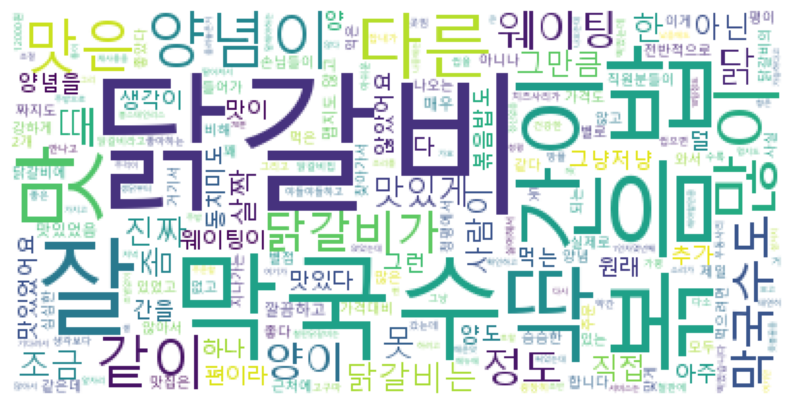

In [109]:
import string
from emoji import core #이모티콘 없애기
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = '‪‪C:\Windows\Fonts\malgun.ttf'

# 리뷰내용 컬럼의 리뷰를 1개의 변수에 저장하고, 텍스트 클리닝
test = []
d_K9X9Uwxw__['리뷰내용'].apply(lambda x: test.append(x))
test = " ".join(test)
test = test.translate(str.maketrans(".", " ", string.punctuation)).replace("ㅋ", " ").replace("ㅠ", " ")
core.replace_emoji(test).replace("ㅎ", " ").replace("  ", " ").strip()

# wordcloud만들기
wc = WordCloud(
    max_words = 200,
    font_path = font_path,
    background_color = 'white',
    stopwords = ['것','더','먹고','정말',]).generate(test)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
# plt.show()
plt.savefig("test.png")
# plt.close()

* ID별 데이터프레임에서 리뷰내용을 추출해 id별 변수에 합치고, 텍스트 전처리 하고 워드 클라우드 만들기

In [56]:
for val in globals():
#     print(val)
#     print(type(val))
    if val[:2] == 'd_':
        print(val)

d_95qxQRtNJ7
d_z-4tCw3TKCKn
d_N6w7uRM87AFF
d_PRp5uBgsOXUB
d_1wuy7OLPF6RB
d_1DoTDiGuCe
d_SaCJTvz6fPV8
d_RV4Zzfq6pY5F
d_6bp9NtVjCCwL
d_DtNd7lLzTLZU
d_PHhjurEApSpz
d_wb8qseDzWz--
d_chRlP6_axm
d_2qFEx0pXrDdZ
d_qDEx6OvquvRg
d_IRzTlg4LWoZs
d_XtoUWBHKT6wT
d_n4N6o-A4zE
d_6xQY0t3A6o
d_G2ru9jzd7nEu
d_QT2Oqp0tHL
d_ElOtkXR8nKHV
d_dQFSBbkQXG
d_W7ie2Qm0gZ
d_78XDv53pER
d_XFe6Dh0ixpl9
d_zYzhPaX003
d_r5ZoupYsk_
d_eumy5vRx5i
d_-SvQDki5HNzQ
d_Xoqe_P0XzBFZ
d_BV4sbL163o
d_npW57UkUZN
d_7DQsq__rh_6R
d_rGU39IqaaEHz
d_mHUN9NmKbt
d_r591ZGDG0B5S
d_7RC_kR4A9C9O
d_02sGwSC9-K_E
d_RTC_u7jrxHMl
d_kDd7uvQkQJxl
d_xS--jmJRTWrW
d_kw9JM_fDCE
d_bCF4FCZPy1Cs
d_ZpE60fZcfqLK
d_6CL8lm8a-sTa
d_j2R6rYHA07
d_-tjn7yYAEu7u
d_R3iHj7sZaI
d_XxaofOrFPS7c
d_UgFHZZczFUX-
d_5HeqtDuK5R
d_0mXVkmTdJ7-A
d_nie2d4skIs43
d_xhT-Oi0nDTh3
d_cOPpYpvBoWrH
d_RuhAIld9MRhW
d_aU9XYWbj0z
d_Hr3c9foXkB
d_TNywLOfH_r
d_huHObYt4jS
d_yf06Mlf96h
d_LaDksAG6qj
d_q-ImZ-DGRhlY
d_0XV1ftp1ee_M
d_ULxmbNiSxZ
d_A2WMRSbPSYb_
d_dqL32F-fFBqa
d_SDE1sBTY79Wu
d_go9COSz7hx
d_Gi

In [ ]:
globals()['d_95qxQRtNJ7']

In [60]:
for val in dfs[:2]:
    display(globals()[val])
#     print((val))

,리뷰내용,작성자명,후기점수,url,ID
460769,친구가 정말 좋아하는 곳이라고 해서 절 데려갔는데 고기냄새가 나서 별로 였습니다ㅠㅠ...,쥬냠,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
460770,유명한곳ㅎㅎ24시굿굿 사람도 많았다 기대를 해서 생각보다 막 맛있는건 아니였지만 소...,먹깨비요정*,맛있다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
460771,그냥 해장국 맛~ ㅎㅎ딱히 특별한건 모르겠다.(뼈찜이 유명한 집이었습니다..)다음에...,빨강코알라,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
460772,여기 너무너무너무 와보고 싶었는데 드디어 와봤네요!!8명 단체로 일욜 점심에 방문했...,Jinny,맛있다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
460773,태어나서 처음 먹어본 뼈숯불구이. 우리는 둘이서 소 사이즈를 주문했어요. 주문을 하...,뇽뇽,맛있다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
...,...,...,...,...,...
461284,"-18.07.06(금) 방문-선릉역에는 맛집이 참 많은데, 신동궁도 꽤 오래전부터 ...",면주,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
461285,소주를 먹으로 밤에 많은 사람들이 찾는곳이다.매운걸 못먹는사람은 뼈숯불구이는 안먹기...,심야식당,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
461286,신동궁 뼈 숮불구이돼지등뼈를 숯불에 구워 양념을 익혀 골골루매운향이 베어있어 중독적...,민욱,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
461287,친구랑 둘이가서 뼈숯불구이 소자 (28000원)을 시켰어요배부르게 잘 먹었습니다 뼈...,zzzzzo!,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7


,리뷰내용,작성자명,후기점수,url,ID


In [72]:
d_95qxQRtNJ7

,리뷰내용,작성자명,후기점수,url,ID
460769,친구가 정말 좋아하는 곳이라고 해서 절 데려갔는데 고기냄새가 나서 별로 였습니다ㅠㅠ...,쥬냠,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
460770,유명한곳ㅎㅎ24시굿굿 사람도 많았다 기대를 해서 생각보다 막 맛있는건 아니였지만 소...,먹깨비요정*,맛있다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
460771,그냥 해장국 맛~ ㅎㅎ딱히 특별한건 모르겠다.(뼈찜이 유명한 집이었습니다..)다음에...,빨강코알라,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
460772,여기 너무너무너무 와보고 싶었는데 드디어 와봤네요!!8명 단체로 일욜 점심에 방문했...,Jinny,맛있다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
460773,태어나서 처음 먹어본 뼈숯불구이. 우리는 둘이서 소 사이즈를 주문했어요. 주문을 하...,뇽뇽,맛있다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
...,...,...,...,...,...
461284,"-18.07.06(금) 방문-선릉역에는 맛집이 참 많은데, 신동궁도 꽤 오래전부터 ...",면주,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
461285,소주를 먹으로 밤에 많은 사람들이 찾는곳이다.매운걸 못먹는사람은 뼈숯불구이는 안먹기...,심야식당,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
461286,신동궁 뼈 숮불구이돼지등뼈를 숯불에 구워 양념을 익혀 골골루매운향이 베어있어 중독적...,민욱,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
461287,친구랑 둘이가서 뼈숯불구이 소자 (28000원)을 시켰어요배부르게 잘 먹었습니다 뼈...,zzzzzo!,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7


In [78]:
d_95qxQRtNJ7

,리뷰내용,작성자명,후기점수,url,ID
460769,친구가 정말 좋아하는 곳이라고 해서 절 데려갔는데 고기냄새가 나서 별로 였습니다ㅠㅠ...,쥬냠,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
460770,유명한곳ㅎㅎ24시굿굿 사람도 많았다 기대를 해서 생각보다 막 맛있는건 아니였지만 소...,먹깨비요정*,맛있다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
460771,그냥 해장국 맛~ ㅎㅎ딱히 특별한건 모르겠다.(뼈찜이 유명한 집이었습니다..)다음에...,빨강코알라,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
460772,여기 너무너무너무 와보고 싶었는데 드디어 와봤네요!!8명 단체로 일욜 점심에 방문했...,Jinny,맛있다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
460773,태어나서 처음 먹어본 뼈숯불구이. 우리는 둘이서 소 사이즈를 주문했어요. 주문을 하...,뇽뇽,맛있다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
...,...,...,...,...,...
461284,"-18.07.06(금) 방문-선릉역에는 맛집이 참 많은데, 신동궁도 꽤 오래전부터 ...",면주,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
461285,소주를 먹으로 밤에 많은 사람들이 찾는곳이다.매운걸 못먹는사람은 뼈숯불구이는 안먹기...,심야식당,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
461286,신동궁 뼈 숮불구이돼지등뼈를 숯불에 구워 양념을 익혀 골골루매운향이 베어있어 중독적...,민욱,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7
461287,친구랑 둘이가서 뼈숯불구이 소자 (28000원)을 시켰어요배부르게 잘 먹었습니다 뼈...,zzzzzo!,괜찮다,https://www.mangoplate.com/restaurants/95qxQRtNJ7,95qxQRtNJ7


In [71]:
dfs

['d_95qxQRtNJ7',
 'd_z-4tCw3TKCKn',
 'd_N6w7uRM87AFF',
 'd_PRp5uBgsOXUB',
 'd_1wuy7OLPF6RB',
 'd_1DoTDiGuCe',
 'd_SaCJTvz6fPV8',
 'd_RV4Zzfq6pY5F',
 'd_6bp9NtVjCCwL',
 'd_DtNd7lLzTLZU',
 'd_PHhjurEApSpz',
 'd_wb8qseDzWz--',
 'd_chRlP6_axm',
 'd_2qFEx0pXrDdZ',
 'd_qDEx6OvquvRg',
 'd_IRzTlg4LWoZs',
 'd_XtoUWBHKT6wT',
 'd_n4N6o-A4zE',
 'd_6xQY0t3A6o',
 'd_G2ru9jzd7nEu',
 'd_QT2Oqp0tHL',
 'd_ElOtkXR8nKHV',
 'd_dQFSBbkQXG',
 'd_W7ie2Qm0gZ',
 'd_78XDv53pER',
 'd_XFe6Dh0ixpl9',
 'd_zYzhPaX003',
 'd_r5ZoupYsk_',
 'd_eumy5vRx5i',
 'd_-SvQDki5HNzQ',
 'd_Xoqe_P0XzBFZ',
 'd_BV4sbL163o',
 'd_npW57UkUZN',
 'd_7DQsq__rh_6R',
 'd_rGU39IqaaEHz',
 'd_mHUN9NmKbt',
 'd_r591ZGDG0B5S',
 'd_7RC_kR4A9C9O',
 'd_02sGwSC9-K_E',
 'd_RTC_u7jrxHMl',
 'd_kDd7uvQkQJxl',
 'd_xS--jmJRTWrW',
 'd_kw9JM_fDCE',
 'd_bCF4FCZPy1Cs',
 'd_ZpE60fZcfqLK',
 'd_6CL8lm8a-sTa',
 'd_j2R6rYHA07',
 'd_-tjn7yYAEu7u',
 'd_R3iHj7sZaI',
 'd_XxaofOrFPS7c',
 'd_UgFHZZczFUX-',
 'd_5HeqtDuK5R',
 'd_0mXVkmTdJ7-A',
 'd_nie2d4skIs43',
 'd_xhT-Oi0n

In [77]:
dfs

['d_95qxQRtNJ7',
 'd_z-4tCw3TKCKn',
 'd_N6w7uRM87AFF',
 'd_PRp5uBgsOXUB',
 'd_1wuy7OLPF6RB',
 'd_1DoTDiGuCe',
 'd_SaCJTvz6fPV8',
 'd_RV4Zzfq6pY5F',
 'd_6bp9NtVjCCwL',
 'd_DtNd7lLzTLZU',
 'd_PHhjurEApSpz',
 'd_wb8qseDzWz--',
 'd_chRlP6_axm',
 'd_2qFEx0pXrDdZ',
 'd_qDEx6OvquvRg',
 'd_IRzTlg4LWoZs',
 'd_XtoUWBHKT6wT',
 'd_n4N6o-A4zE',
 'd_6xQY0t3A6o',
 'd_G2ru9jzd7nEu',
 'd_QT2Oqp0tHL',
 'd_ElOtkXR8nKHV',
 'd_dQFSBbkQXG',
 'd_W7ie2Qm0gZ',
 'd_78XDv53pER',
 'd_XFe6Dh0ixpl9',
 'd_zYzhPaX003',
 'd_r5ZoupYsk_',
 'd_eumy5vRx5i',
 'd_-SvQDki5HNzQ',
 'd_Xoqe_P0XzBFZ',
 'd_BV4sbL163o',
 'd_npW57UkUZN',
 'd_7DQsq__rh_6R',
 'd_rGU39IqaaEHz',
 'd_mHUN9NmKbt',
 'd_r591ZGDG0B5S',
 'd_7RC_kR4A9C9O',
 'd_02sGwSC9-K_E',
 'd_RTC_u7jrxHMl',
 'd_kDd7uvQkQJxl',
 'd_xS--jmJRTWrW',
 'd_kw9JM_fDCE',
 'd_bCF4FCZPy1Cs',
 'd_ZpE60fZcfqLK',
 'd_6CL8lm8a-sTa',
 'd_j2R6rYHA07',
 'd_-tjn7yYAEu7u',
 'd_R3iHj7sZaI',
 'd_XxaofOrFPS7c',
 'd_UgFHZZczFUX-',
 'd_5HeqtDuK5R',
 'd_0mXVkmTdJ7-A',
 'd_nie2d4skIs43',
 'd_xhT-Oi0n

In [76]:
test

''

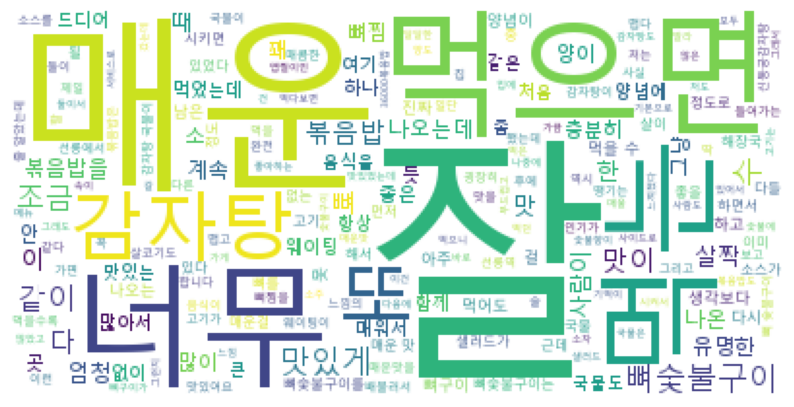

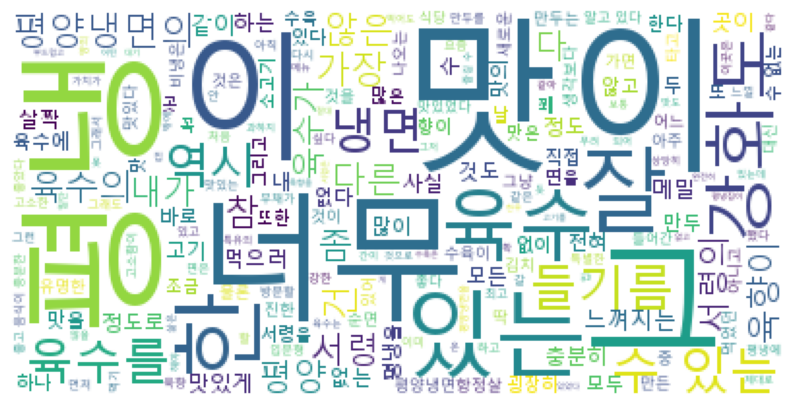

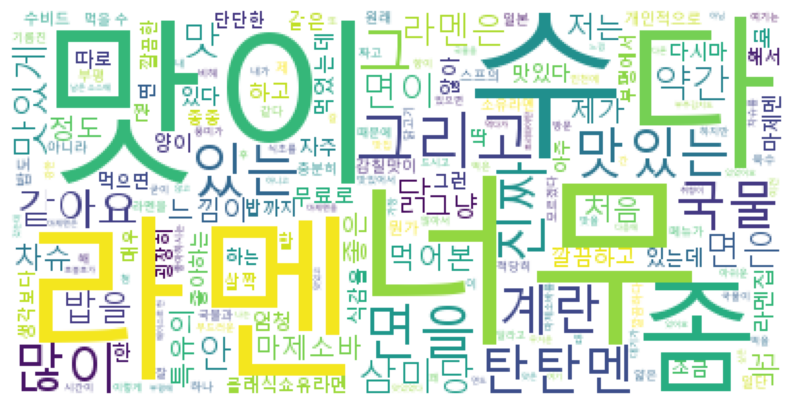

In [111]:
import string
from emoji import core #이모티콘 없애기
from wordcloud import WordCloud

font_path = '‪‪C:\Windows\Fonts\malgun.ttf'

# 리뷰내용 컬럼의 리뷰를 1개의 변수에 저장하고, 텍스트 클리닝
for val in dfs[:3]:
    test = []
    globals()[val]['리뷰내용'].apply(lambda x: test.append(x))
    test = " ".join(test)
    test = test.translate(str.maketrans(".", " ", string.punctuation)).replace("ㅋ", " ").replace("ㅠ", " ")
    test = core.replace_emoji(test).replace("ㅎ", " ").replace("  ", " ").strip()
#     print(test)

    # wordcloud만들기
    wc = WordCloud(
        max_words = 200,
        font_path = font_path,
        background_color = 'white',
        stopwords = ['것','더','먹고','정말',]).generate(test)
    plt.figure(figsize=(10,10))
    plt.imshow(wc)
    plt.axis('off')
    plt.savefig(f"./data/wc/{val}.png")
# plt.close() # 반복문을 돌릴 땐 close로 끝내야해. 하지만 출력은 되지 않아.

In [113]:
def all_word_clouds(dfs):
    import string
    from emoji import core #이모티콘 없애기
    from wordcloud import WordCloud

    font_path = '‪‪C:\Windows\Fonts\malgun.ttf'

    # 리뷰내용 컬럼의 리뷰를 1개의 변수에 저장하고, 텍스트 클리닝
    for val in dfs:
        test = []
        globals()[val]['리뷰내용'].apply(lambda x: test.append(x))
        test = " ".join(test)
        test = test.translate(str.maketrans(".", " ", string.punctuation)).replace("ㅋ", " ").replace("ㅠ", " ")
        test = core.replace_emoji(test).replace("ㅎ", " ").replace("  ", " ").strip()

        # wordcloud만들기
        wc = WordCloud(
            max_words = 200,
            font_path = font_path,
            background_color = 'white',
            stopwords = ['것','더','먹고','정말',]).generate(test)
        plt.figure(figsize=(10,10))
        plt.imshow(wc)
        plt.axis('off')
        plt.savefig(f"./data/wc/{val}.png")
        plt.close() # 반복문을 돌릴 땐 close로 끝내야해. 하지만 출력은 되지 않아.
    print("가게별 워드클라우드 생성 완료")

In [114]:
all_word_clouds(dfs)

가게별 워드클라우드 생성 완료
